In [1]:
!nvidia-smi

Wed Nov  3 08:26:03 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.73.01    Driver Version: 460.73.01    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  TITAN RTX           Off  | 00000000:02:00.0 Off |                  N/A |
| 60%   76C    P0    81W / 280W |      0MiB / 24220MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  TITAN RTX           Off  | 00000000:03:00.0 Off |                  N/A |
| 74%   

In [2]:
!pip install torchsummary

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import cv2
import os
import copy

import random
import torch
import torch.optim as optim

from torch.utils.data import DataLoader
from torchvision import transforms, utils
from torchsummary import summary

from trainer import *
from loss import *
from Unet import *
from preprocessing import *
from datagenerater import *
from utils import *
from progressbar import Bar
from PIL import Image


os.environ['CUDA_VISIBLE_DEVICES'] = '1'
image_size = (512, 512)
image_size = (384, 384)
n_classes = 1
train_batch = 16
test_batch = 1
loss = "dice"

SEED = 42
use_cuda = True
# Random seed
if SEED is None:
    SEED = random.randint(1, 10000)
random.seed(SEED)
torch.manual_seed(SEED)
if use_cuda:
    torch.cuda.manual_seed_all(SEED)
    
# HISTORY_PATH = "/mnt/nas125/InHwanKim/weight/rsm/segmentation(all)/600_data"
# HISTORY_PATH = "/workspace/flat_feet/Unet/weight_unet512_finetune/"
HISTORY_PATH = "/workspace/flat_feet/Unet/weight_unet384_finetune/"

In [2]:
import glob
from natsort import natsorted
from tqdm import trange 

x_path = '/workspace/flat_feet/dataset/flat_feet/image/'
    
y_train = natsorted(glob.glob('/workspace/flat_feet/dataset/flat_feet/label/*.npy'))[:900]
y_val = natsorted(glob.glob('/workspace/flat_feet/dataset/flat_feet/label/*.npy'))[900:1023]

x_train = list()
x_val = list()

for idx in trange(len(y_train)):
    x_train.append(glob.glob(x_path+y_train[idx].split('/')[-1].split('.')[0]+'*.png')[0])
for idx in trange(len(y_val)):
    x_val.append(glob.glob(x_path+y_val[idx].split('/')[-1].split('.')[0]+'*.png')[0])

len(x_train),len(y_train),len(x_val),len(y_val)

100%|██████████| 123/123 [00:01<00:00, 91.81it/s]


(900, 900, 123, 123)

torch.Size([384, 384]) torch.Size([384, 384])


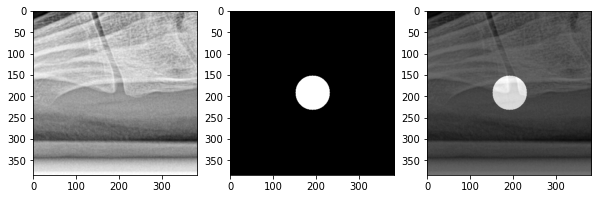

load weight
Use GPU: cuda for training
900/900: [===============================>] - ETA 3.1s    
Epoch: 1. Train Dice:0.92577. Train Loss:0.07423
123/123: [===============================>] - ETA 0.2s   
Epoch: 1. Val Dice:0.98716. Val Loss:0.01284
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet384_finetune//13/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 2.5s    
Epoch: 2. Train Dice:0.95327. Train Loss:0.04673
123/123: [===============================>] - ETA 0.5s   
Epoch: 2. Val Dice:0.98794. Val Loss:0.01206
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet384_finetune//13/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 2.7s    
Ep

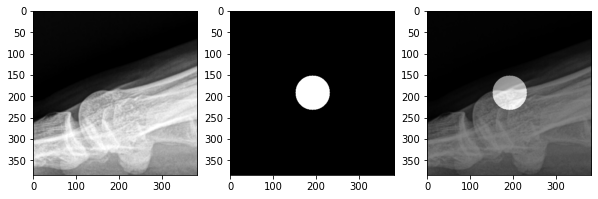

load weight
Use GPU: cuda for training
900/900: [===============================>] - ETA 2.6s    
Epoch: 1. Train Dice:0.92659. Train Loss:0.07341
123/123: [===============================>] - ETA 0.2s   
Epoch: 1. Val Dice:0.98110. Val Loss:0.01890
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet384_finetune//14/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 2.2s    
Epoch: 2. Train Dice:0.95242. Train Loss:0.04758
123/123: [===============================>] - ETA 0.2s   
Epoch: 2. Val Dice:0.98405. Val Loss:0.01595
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet384_finetune//14/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 2.4s    
Ep

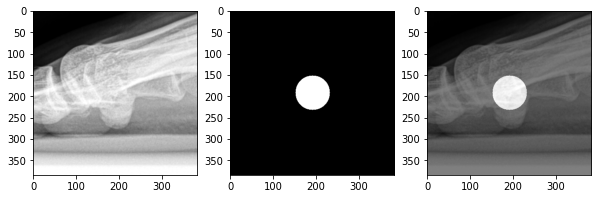

load weight
Use GPU: cuda for training
900/900: [===============================>] - ETA 2.4s    
Epoch: 1. Train Dice:0.91821. Train Loss:0.08179
123/123: [===============================>] - ETA 0.2s   
Epoch: 1. Val Dice:0.96843. Val Loss:0.03157
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet384_finetune//15/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 2.7s    
Epoch: 2. Train Dice:0.93369. Train Loss:0.06631
123/123: [===============================>] - ETA 0.1s   
Epoch: 2. Val Dice:0.97675. Val Loss:0.02325
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet384_finetune//15/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 2.8s    
Ep

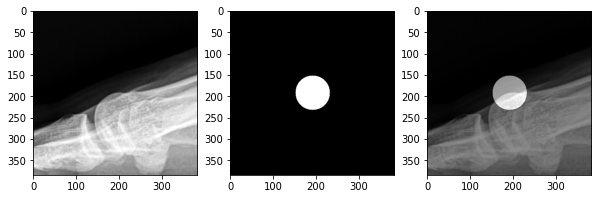

load weight
Use GPU: cuda for training
900/900: [===============================>] - ETA 2.6s    
Epoch: 1. Train Dice:0.94876. Train Loss:0.05124
123/123: [===============================>] - ETA 0.2s   
Epoch: 1. Val Dice:0.99099. Val Loss:0.00901
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet384_finetune//16/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 2.4s    
Epoch: 2. Train Dice:0.96386. Train Loss:0.03614
123/123: [===============================>] - ETA 0.2s   
Epoch: 2. Val Dice:0.98876. Val Loss:0.01124
900/900: [===============================>] - ETA 2.6s    
Epoch: 3. Train Dice:0.96458. Train Loss:0.03542
123/123: [===============================>] - ETA 0.1s   
Epoch: 3. Val Dice:0.99065. Val Loss:0.00935
900/900: [===============================>] - ETA 2.9s    
Epoch: 4. Train Dice:0.96572. 

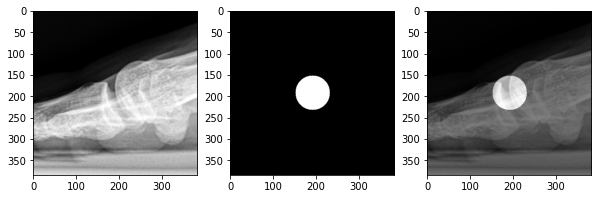

load weight
Use GPU: cuda for training
900/900: [===============================>] - ETA 2.3s    
Epoch: 1. Train Dice:0.93801. Train Loss:0.06199
123/123: [===============================>] - ETA 0.2s   
Epoch: 1. Val Dice:0.98627. Val Loss:0.01373
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet384_finetune//17/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 2.4s    
Epoch: 2. Train Dice:0.95389. Train Loss:0.04611
123/123: [===============================>] - ETA 0.1s   
Epoch: 2. Val Dice:0.98699. Val Loss:0.01301
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet384_finetune//17/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 3.0s    
Ep

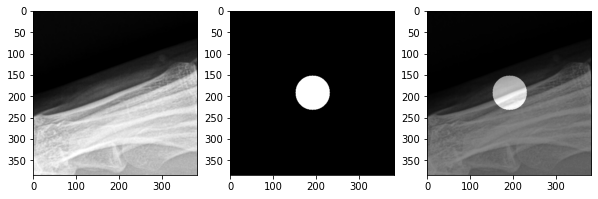

load weight
Use GPU: cuda for training
900/900: [===============================>] - ETA 2.8s    
Epoch: 1. Train Dice:0.90744. Train Loss:0.09256
123/123: [===============================>] - ETA 0.1s   
Epoch: 1. Val Dice:0.98120. Val Loss:0.01880
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet384_finetune//18/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 2.7s    
Epoch: 2. Train Dice:0.94617. Train Loss:0.05383
123/123: [===============================>] - ETA 0.2s   
Epoch: 2. Val Dice:0.97655. Val Loss:0.02345
900/900: [===============================>] - ETA 2.6s    
Epoch: 3. Train Dice:0.95146. Train Loss:0.04854
123/123: [===============================>] - ETA 0.2s   
Epoch: 3. Val Dice:0.98689. Val Loss:0.01311
********************************************************************************
model_sa

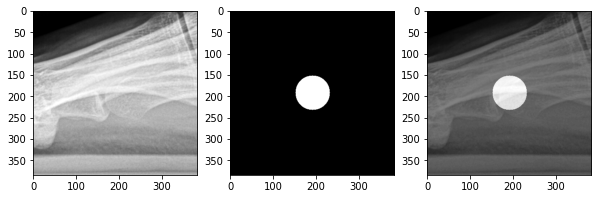

load weight
Use GPU: cuda for training
900/900: [===============================>] - ETA 2.5s    
Epoch: 1. Train Dice:0.91810. Train Loss:0.08190
123/123: [===============================>] - ETA 0.1s   
Epoch: 1. Val Dice:0.97336. Val Loss:0.02664
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet384_finetune//19/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 2.5s    
Epoch: 2. Train Dice:0.95430. Train Loss:0.04570
123/123: [===============================>] - ETA 0.1s   
Epoch: 2. Val Dice:0.98589. Val Loss:0.01411
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet384_finetune//19/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 2.4s    
Ep

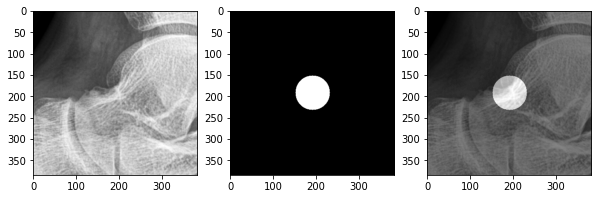

load weight
Use GPU: cuda for training
900/900: [===============================>] - ETA 1.9s    
Epoch: 1. Train Dice:0.91518. Train Loss:0.08482
123/123: [===============================>] - ETA 0.2s   
Epoch: 1. Val Dice:0.95539. Val Loss:0.04461
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet384_finetune//20/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 2.3s    
Epoch: 2. Train Dice:0.94115. Train Loss:0.05885
123/123: [===============================>] - ETA 0.1s   
Epoch: 2. Val Dice:0.95889. Val Loss:0.04111
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet384_finetune//20/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 2.7s    
Ep

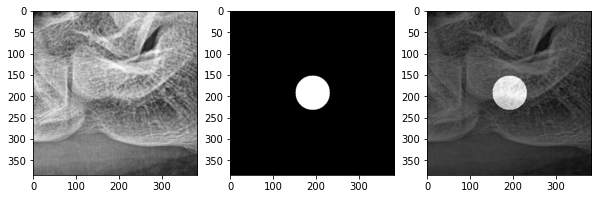

load weight
Use GPU: cuda for training
900/900: [===============================>] - ETA 2.3s    
Epoch: 1. Train Dice:0.86768. Train Loss:0.13232
123/123: [===============================>] - ETA 0.1s   
Epoch: 1. Val Dice:0.95952. Val Loss:0.04048
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet384_finetune//21/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 2.4s    
Epoch: 2. Train Dice:0.92900. Train Loss:0.07100
123/123: [===============================>] - ETA 0.1s   
Epoch: 2. Val Dice:0.97979. Val Loss:0.02021
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet384_finetune//21/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 2.7s    
Ep

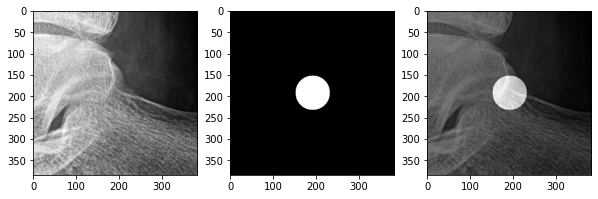

load weight
Use GPU: cuda for training
900/900: [===============================>] - ETA 2.0s    
Epoch: 1. Train Dice:0.82281. Train Loss:0.17719
123/123: [===============================>] - ETA 0.1s   
Epoch: 1. Val Dice:0.95889. Val Loss:0.04111
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet384_finetune//22/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 2.3s    
Epoch: 2. Train Dice:0.93251. Train Loss:0.06749
123/123: [===============================>] - ETA 0.1s   
Epoch: 2. Val Dice:0.96818. Val Loss:0.03182
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet384_finetune//22/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 2.1s    
Ep

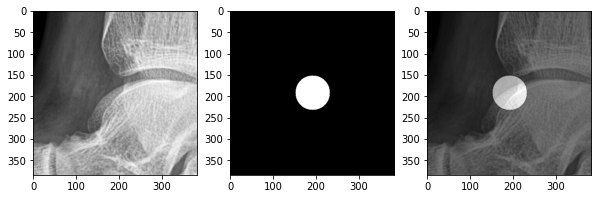

load weight
Use GPU: cuda for training
900/900: [===============================>] - ETA 2.0s    
Epoch: 1. Train Dice:0.91111. Train Loss:0.08889
123/123: [===============================>] - ETA 0.1s   
Epoch: 1. Val Dice:0.98145. Val Loss:0.01855
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet384_finetune//23/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 2.3s    
Epoch: 2. Train Dice:0.94089. Train Loss:0.05911
123/123: [===============================>] - ETA 0.1s   
Epoch: 2. Val Dice:0.98070. Val Loss:0.01930
900/900: [===============================>] - ETA 2.3s    
Epoch: 3. Train Dice:0.94322. Train Loss:0.05678
123/123: [===============================>] - ETA 0.1s   
Epoch: 3. Val Dice:0.97902. Val Loss:0.02098
900/900: [===============================>] - ETA 1.9s    
Epoch: 4. Train Dice:0.94923. 

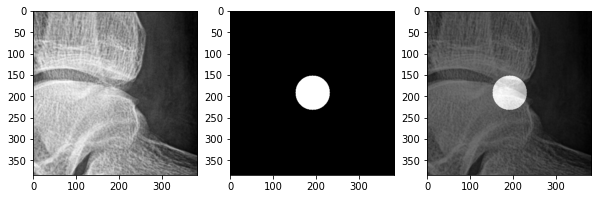

load weight
Use GPU: cuda for training
900/900: [===============================>] - ETA 2.3s    
Epoch: 1. Train Dice:0.88675. Train Loss:0.11325
123/123: [===============================>] - ETA 0.1s   
Epoch: 1. Val Dice:0.96388. Val Loss:0.03612
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet384_finetune//24/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 2.6s    
Epoch: 2. Train Dice:0.92867. Train Loss:0.07133
123/123: [===============================>] - ETA 0.1s   
Epoch: 2. Val Dice:0.97436. Val Loss:0.02564
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet384_finetune//24/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 2.8s    
Ep

In [3]:
maximum_loss = [1.0]*25
for LN in range(13,25,1):

#     DIR = '/mnt/nas125/InHwanKim/data/rsm/data(600)/'
# #     DIR = '/workspace/flat_feet/Unet/'

#     x_train = np.load(DIR + "train_images.npy")
#     y_train = np.load(DIR + "train_points.npy")
#     x_val = np.load(DIR + "valid_images.npy")
#     y_val = np.load(DIR + "valid_points.npy")
    
#     x_train = natsorted(glob.glob('/workspace/flat_feet/dataset/flat_feet/image/*.png'))[:900]
#     y_train = natsorted(glob.glob('/workspace/flat_feet/dataset/flat_feet/label/*.npy'))[:900]
#     x_val = natsorted(glob.glob('/workspace/flat_feet/dataset/flat_feet/image/*.png'))[900:1023]
#     y_val = natsorted(glob.glob('/workspace/flat_feet/dataset/flat_feet/label/*.npy'))[900:1023]
    
    #x_test = np.load(DIR + "pjw_x_test.npy")
    #y_test = np.load(DIR + "pjw_y_test.npy")

    transform_train = transforms.Compose([
    Gamma_2D(),
    Shift_2D(),
    RandomBrightness(),
    Rotation_2D(),
    RandomSharp(),
    RandomBlur(),
    RandomNoise(),
    Invert(),
    RandomClahe(),
    ToTensor(),
    ])

    transform_test = transforms.Compose([
        ToTensor(),
    ])


    trainset = Dental_Single_Data_Generator(
        image_size, x_train, y_train, landmark_num = LN, mode = "train", transform=transform_train
    )
    trainloader = DataLoader(trainset, batch_size=train_batch, shuffle=True)

    testset = Dental_Single_Data_Generator(
        image_size, x_val, y_val, landmark_num = LN, mode = "train", transform=transform_test
    )
    testloader = DataLoader(testset, batch_size=1, shuffle=False)
    
    for j in range(0,1,1):
        sample = next(iter(testloader))
        image = sample['image'][0]
        mask = sample['landmarks'][0]
        
        plt.figure(figsize=(10, 6))
        plt.subplot(1, 3, 1)
        image = np.squeeze(image,0)
        plt.imshow(image, 'gray')
        plt.subplot(1, 3, 2)
        mask = np.squeeze(mask,0)
        plt.imshow(mask,'gray')
        plt.subplot(1, 3, 3)
        print(image.shape, mask.shape)
        add = image + mask
        plt.imshow(add,'gray')
        plt.show() 
        
    
#     model = UNet(n_channels = 1, n_classes = 1)
    import segmentation_models_pytorch as smp
    model = smp.Unet(encoder_name='timm-tf_efficientnet_lite4',decoder_attention_type='scse', in_channels = 1, classes = 1)
    try:
        weight_file = natsorted(glob.glob(HISTORY_PATH+str(LN)+'/*'))[-1]
        weight = torch.load(weight_file)
        model.load_state_dict(weight)
        print('load weight')
    except:
        print('no weight')
    
    if torch.cuda.device_count() > 1:
        print("Let's use", torch.cuda.device_count(), "GPUs!")      
        model = nn.DataParallel(model)

    device = torch.device('cuda')

    if device is not None:
        print("Use GPU: {} for training".format(device))

    if not torch.cuda.is_available():
        print('using CPU, this will be slow')
    else:
        model.to(device)

    #summary(model, input_size=(1, 512, 512))
    best_acc_wts = copy.deepcopy(model.state_dict())

    #criterion = BinaryDiceLoss().cuda()
    optimizer = torch.optim.Adam(model.parameters(), lr = 5e-4)    
    
    mean_train_losses = []
    mean_val_losses = []
    
    for epoch in range(10):
        train_losses = []
        train_dice = []
        val_losses = []
        val_dice = []
        
        
        for batch_idx, sample in enumerate(Bar(trainloader)):    

            images,masks = sample['image'].to(device), sample['landmarks'].to(device)

            outputs = model(images)
            outputs= torch.sigmoid(outputs)

            loss = dice_loss(outputs, masks)
            ddice = dice(outputs, masks)

            train_losses.append(loss.data.cpu().numpy())
            train_dice.append(ddice.data.cpu().numpy())

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
        print('Epoch: {}. Train Dice:{:.5f}. Train Loss:{:.5f}'.format(epoch+1, np.mean(train_dice), np.mean(train_losses)))

        for batch_idx, sample in enumerate(Bar(testloader)):    
            images,masks = sample['image'].to(device), sample['landmarks'].to(device)

            outputs = model(images)
            outputs= torch.sigmoid(outputs)
            loss = dice_loss(outputs, masks)
            ddice = dice(outputs, masks)
            val_losses.append(loss.data.cpu().numpy())
            val_dice.append(ddice.data.cpu().numpy())
            
        print('Epoch: {}. Val Dice:{:.5f}. Val Loss:{:.5f}'.format(epoch+1, np.mean(val_dice), np.mean(val_losses)))

        mean_train_losses.append(np.mean(train_losses))
        mean_val_losses.append(np.mean(val_losses))
        # Print Loss
        if(np.mean(val_losses) < maximum_loss[LN]):
            maximum_loss[LN] = np.mean(val_losses)
            
            directory = HISTORY_PATH  + "/" +str(LN)
            
            if not os.path.exists(directory):
                os.makedirs(directory)
                
            filename = directory  + "/"  +'weight.pth'                          
            torch.save(model.state_dict(), filename)
            print("*"*80)
            print("model_save!",filename)
            print("*"*80)